<a href="https://colab.research.google.com/github/chandanravic/ML/blob/main/credit_card_fraud_detection_google_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

Below generating a new table which holds customer and terminal info,  mean spends , standard deviation , transactions per day ( all limits are following uniform distrubution with small values)

In [2]:
def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    for customer_id in range(n_customers):

        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_amount = np.random.uniform(5,100)
        std_amount = mean_amount/2

        mean_nb_tx_per_day = np.random.uniform(0,4)

        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])

    return customer_profiles_table

In [3]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


creating terminal profiles(merchant profiles) just like customer tables and adding 3 columns only.  termial id, x and y. as location quadrant (to know how far as customers from terminals)

In [4]:
def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])

    return terminal_profiles_table

In [5]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


now matching terminal go locations with the customer location to find merchants within the radius 50. only these can have transactions as per our method

In [6]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)

    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    available_terminals = list(np.where(dist_x_y<r)[0])

    return available_terminals


In [7]:
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [8]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


Plotting to find out custoeers against the terminals, logic stays as above to check for distance  ie r = 50

In [9]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

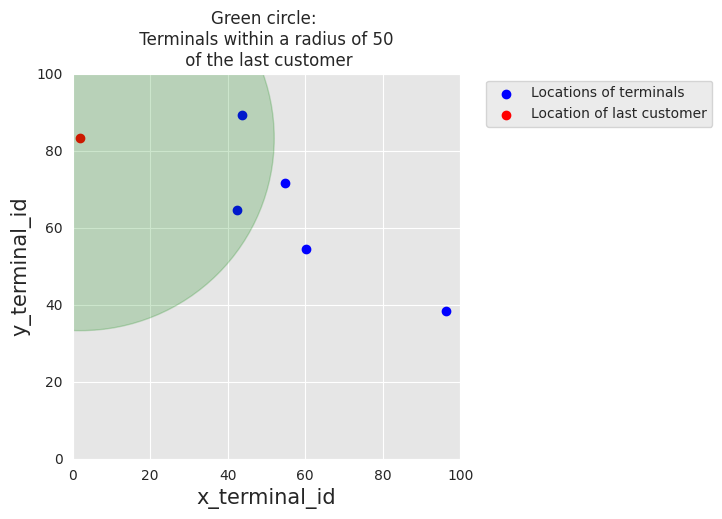

In [10]:
terminals_available_to_customer_fig

Adding a column just like string aggregate function in SQL, which shows list of avaliable terminasl for the customers

In [11]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


we have curated all details required for a transaction, now generating a random transaction

step 1 = definging a function with id, date and transaction interval

2  = creating an customer_transaction table to store later

3= random seeding between customer id and tx, psude value does not change

4 =  itterating days in this case nb_days is 10 (starting from april 1 till 10)

5 = then create random number of transactions for these days -
  txn_per_day = will be poisson distributed  date for time of the transactoin
>>> logic is  day /2 assuming transaction will happen during mid day and stadard deviation of 20000.

6 = next if there are any transactions present in  a day , ie if tx > 0
>>> then random normal disturbuted mean amount
>> and checking if the txn time is with the day ie < 86000 sec

7 = matching terminal ids if range is > 0

8 = putting the date into dataframe  = customer_transactions

9 = adding time stamp as well considering as transaction date


In [12]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    for day in range(nb_days):

        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        if nb_tx>0:

            for tx in range(nb_tx):

                time_tx = int(np.random.normal(86400/2, 20000))

                if (time_tx>0) and (time_tx<86400):

                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = random.choice(customer_profile.available_terminals)

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions



In [13]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0],
                                                         start_date = "2018-04-01",
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
5,2018-04-02 15:46:51,0,3,13.59,143211,1
6,2018-04-02 08:51:06,0,2,54.72,118266,1
7,2018-04-02 20:24:47,0,3,51.89,159887,1
8,2018-04-03 12:15:47,0,2,117.91,216947,2
9,2018-04-03 08:50:09,0,1,67.72,204609,2


creating transaction for all customers now

In [14]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,2,111.38,373279,4
61,2018-04-05 06:59:59,4,3,80.36,370799,4
62,2018-04-05 17:23:34,4,2,53.25,408214,4
63,2018-04-05 12:51:38,4,2,36.44,391898,4


now we are about to scale the transactions,  above is created for a subset , now we can create for n custoemrs and y terminals and x days as required

steps:
1.define new function to create transactsion

2.calling previous created function to create n customers profile and y terminals

3.and creating transactions for available terminals only.

4.then putting all the data into new dataframe called transaction_df

5.sorting values and creating a unique transaction id




In [15]:
def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2018-04-01", r=5):

    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)

    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)

    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    transactions_df=transactions_df.sort_values('TX_DATETIME')
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


In [16]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=183,
                     start_date="2018-04-01",
                     r=5)

Time to generate customer profiles table: 0.15s
Time to generate terminal profiles table: 0.055s
Time to associate terminals to customers: 4.4s
Time to generate transactions: 1.5e+02s


In [17]:
transactions_df.shape

(1754155, 7)

In [18]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0
...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182


Plotting bar graph to check distribution of data.
1 graph shows  the money spent

In [19]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

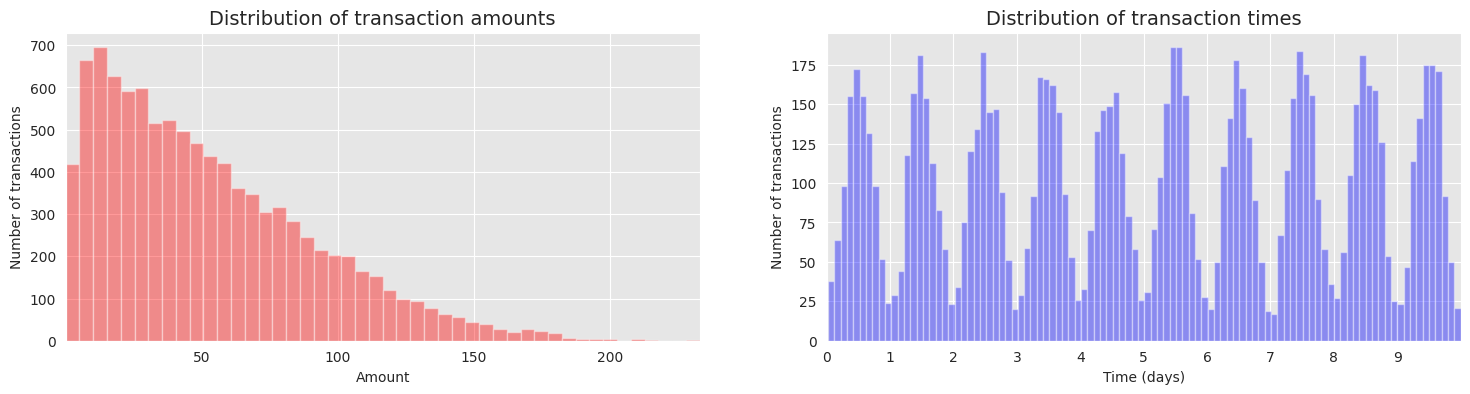

In [20]:
distribution_amount_times_fig

Generating fraud transactions and giving 3 potential rules for a fraud

scenario 1. transaction amoutn > 220

scenario 2. picking random terminal and assing its last 28 txn as fraud

scenario 3 .  suspicious transaction not the usual behaviour ie, where spending has increasred upto 5 times or 1/3 of the usual



In [21]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df

In [22]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 978
Number of frauds from scenario 2: 9099
Number of frauds from scenario 3: 4604
CPU times: user 2min 11s, sys: 411 ms, total: 2min 12s
Wall time: 2min 12s


Now checking and validating the fraud scenarios created.

we are looking at the avearge fraudlent transactions, total frauds,  frauds which fall under the scenarios given

In [23]:
transactions_df.TX_FRAUD.mean()

0.008369271814634397

In [24]:
transactions_df.TX_FRAUD.sum()

14681

In [25]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [26]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(973, 9)

In [27]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(9077, 9)

In [28]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(4631, 9)

In [29]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [30]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

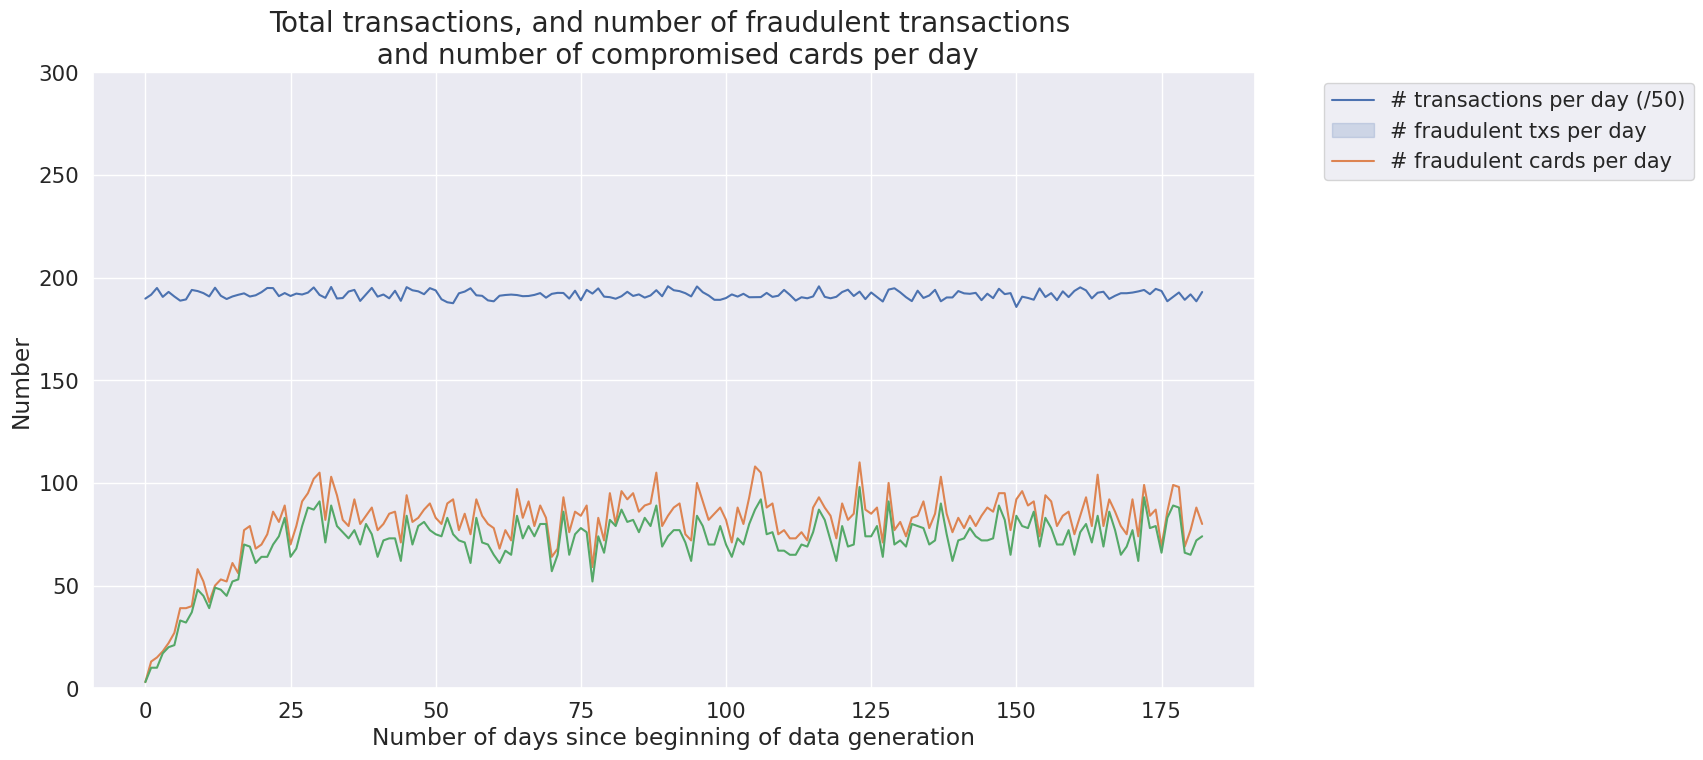

In [31]:
fraud_and_transactions_stats_fig

In [32]:
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [33]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-raw"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   292k      0 --:--:-- --:--:-- --:--:--  292k


<Figure size 640x480 with 0 Axes>

In [34]:
DIR_INPUT='./simulated-data-raw/data/'

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files


FileNotFoundError: ignored

1754155 transactions loaded, containing 14681 fraudulent transactions


In [35]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


adding weekend feature

In [36]:
def is_weekend(tx_datetime):

    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5

    return int(is_weekend)

In [37]:
%time transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

CPU times: user 4.33 s, sys: 184 ms, total: 4.51 s
Wall time: 4.5 s


In [38]:
def is_night(tx_datetime):

    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6

    return int(is_night)

In [39]:
%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

CPU times: user 4.66 s, sys: 156 ms, total: 4.82 s
Wall time: 4.86 s


In [40]:
transactions_df[transactions_df.TX_TIME_DAYS>=30]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
288062,288062,2018-05-01 00:01:21,3546,2944,18.71,2592081,30,0,0,0,1
288063,288063,2018-05-01 00:01:48,206,3521,18.60,2592108,30,0,0,0,1
288064,288064,2018-05-01 00:02:22,2610,4470,66.67,2592142,30,0,0,0,1
288065,288065,2018-05-01 00:03:15,4578,1520,79.41,2592195,30,0,0,0,1
288066,288066,2018-05-01 00:03:51,1246,7809,52.08,2592231,30,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0


adding features to customers transactions in day size [1,7, 10]

1- avg amount spent per transaction.
2 - total number of transactions
3 - cummulative amount spent on transactions.


In [41]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):

    customer_transactions=customer_transactions.sort_values('TX_DATETIME')

    customer_transactions.index=customer_transactions.TX_DATETIME

    for window_size in windows_size_in_days:

        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW

        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)

    customer_transactions.index=customer_transactions.TRANSACTION_ID

    return customer_transactions

In [42]:
spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behaviour_customer_0

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,
1758,1758,2018-04-01 07:19:05,0,6076,123.59,26345,0,0,0,1,0,1.0,123.590000,1.0,123.590000,1.0,123.590000
8275,8275,2018-04-01 18:00:16,0,858,77.34,64816,0,0,0,1,0,2.0,100.465000,2.0,100.465000,2.0,100.465000
8640,8640,2018-04-01 19:02:02,0,6698,46.51,68522,0,0,0,1,0,3.0,82.480000,3.0,82.480000,3.0,82.480000
12169,12169,2018-04-02 08:51:06,0,6569,54.72,118266,1,0,0,0,0,3.0,59.523333,4.0,75.540000,4.0,75.540000
15764,15764,2018-04-02 14:05:38,0,7707,63.30,137138,1,0,0,0,0,4.0,60.467500,5.0,73.092000,5.0,73.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750390,1750390,2018-09-30 13:38:41,0,3096,38.23,15773921,182,0,0,1,0,5.0,64.388000,28.0,57.306429,89.0,63.097640
1750758,1750758,2018-09-30 14:10:21,0,9441,43.60,15775821,182,0,0,1,0,6.0,60.923333,29.0,56.833793,89.0,62.433933
1751039,1751039,2018-09-30 14:34:30,0,1138,69.69,15777270,182,0,0,1,0,7.0,62.175714,29.0,57.872414,90.0,62.514556


In [43]:
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: user 39.7 s, sys: 761 ms, total: 40.4 s
Wall time: 40.6 s


In [44]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1,1.0,57.160000,1.0,57.160000,1.0,57.160000
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1,1.0,81.510000,1.0,81.510000,1.0,81.510000
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1,1.0,64.490000,1.0,64.490000,1.0,64.490000
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1,1.0,50.990000,1.0,50.990000,1.0,50.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0,2.0,75.280000,12.0,67.047500,72.0,69.521111
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0,1.0,1.230000,21.0,22.173810,93.0,24.780753
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0,5.0,7.368000,21.0,7.400476,65.0,7.864462
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0,3.0,100.696667,16.0,107.052500,51.0,102.919608


below creating deladed transaction features, this shows the average order count and amount for transaction days 1, 7 and 30 days

In [45]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):

    terminal_transactions=terminal_transactions.sort_values('TX_DATETIME')

    terminal_transactions.index=terminal_transactions.TX_DATETIME

    NB_FRAUD_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()

    for window_size in windows_size_in_days:

        NB_FRAUD_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()

        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY

        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW

        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)

    terminal_transactions.index=terminal_transactions.TRANSACTION_ID

    terminal_transactions.fillna(0,inplace=True)

    return terminal_transactions

In [46]:
transactions_df[transactions_df.TX_FRAUD==1]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
3527,3527,2018-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,0,3.0,158.073333,3.0,158.073333,3.0,158.073333
5789,5790,2018-04-01 13:31:48,4944,6050,222.26,48708,0,1,1,1,0,2.0,127.605000,2.0,127.605000,2.0,127.605000
6549,6549,2018-04-01 14:42:02,4625,9102,226.40,52922,0,1,1,1,0,4.0,167.165000,4.0,167.165000,4.0,167.165000
9583,9583,2018-04-02 01:01:05,3814,6893,59.15,90065,1,1,3,0,1,6.0,29.138333,6.0,29.138333,6.0,29.138333
10356,10355,2018-04-02 05:03:35,2513,1143,222.04,104615,1,1,1,0,1,5.0,123.740000,5.0,123.740000,5.0,123.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753524,1753524,2018-09-30 19:51:48,1671,3192,128.60,15796308,182,1,3,1,0,6.0,138.358333,25.0,106.957200,82.0,75.621341
1753600,1753600,2018-09-30 20:09:00,4166,632,17.39,15797340,182,1,2,1,0,3.0,19.766667,19.0,15.984737,86.0,15.846512
1753673,1753673,2018-09-30 20:30:52,4097,1558,24.04,15798652,182,1,2,1,0,3.0,23.050000,16.0,40.440625,63.0,41.877460
1754014,1754014,2018-09-30 22:27:04,100,8604,73.85,15805624,182,1,3,1,0,2.0,48.010000,26.0,30.384231,103.0,23.627184


In [47]:
# checking the above feature for just one customer id = 0
transactions_df[transactions_df.TX_FRAUD==0].TERMINAL_ID[0]

3156

In [48]:
get_count_risk_rolling_window(transactions_df[transactions_df.TERMINAL_ID==3059], delay_period=7, windows_size_in_days=[1,7,30])

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
3527,3527,2018-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,...,3.0,158.073333,3.0,158.073333,0.0,0.0,0.0,0.0,0.0,0.0
4732,4732,2018-04-01 11:59:14,55,3059,36.28,43154,0,0,0,1,...,2.0,35.670000,2.0,35.670000,0.0,0.0,0.0,0.0,0.0,0.0
16216,16216,2018-04-02 14:47:34,4879,3059,105.00,139654,1,0,0,0,...,10.0,76.010000,10.0,76.010000,0.0,0.0,0.0,0.0,0.0,0.0
18249,18249,2018-04-02 19:08:10,2263,3059,90.89,155290,1,0,0,0,...,7.0,50.458571,7.0,50.458571,0.0,0.0,0.0,0.0,0.0,0.0
26512,26512,2018-04-03 15:44:49,4879,3059,58.51,229489,2,0,0,0,...,14.0,71.070000,14.0,71.070000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697944,1697944,2018-09-25 05:32:56,402,3059,57.30,15312776,177,0,0,0,...,14.0,65.167857,46.0,68.163261,1.0,0.0,9.0,0.0,36.0,0.0
1701971,1701971,2018-09-25 12:30:54,1035,3059,7.56,15337854,177,0,0,0,...,23.0,7.052174,107.0,6.763738,2.0,0.0,10.0,0.0,36.0,0.0
1704512,1704512,2018-09-25 16:37:41,1519,3059,35.79,15352661,177,0,0,0,...,7.0,41.404286,30.0,46.780000,1.0,0.0,9.0,0.0,36.0,0.0


In [49]:
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: user 1min 42s, sys: 807 ms, total: 1min 43s
Wall time: 1min 44s


In [50]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.00000
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.00000
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.00000
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.00000
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,...,12.0,67.047500,72.0,69.521111,1.0,0.0,4.0,0.0,28.0,0.00000
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,...,21.0,22.173810,93.0,24.780753,1.0,0.0,9.0,0.0,39.0,0.00000
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,...,21.0,7.400476,65.0,7.864462,1.0,0.0,5.0,0.0,33.0,0.00000
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,...,16.0,107.052500,51.0,102.919608,1.0,0.0,6.0,0.0,28.0,0.00000


In [51]:
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)


In [52]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   678k      0 --:--:-- --:--:-- --:--:--  678k


In [53]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/data/'

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files


FileNotFoundError: ignored

1754155 transactions loaded, containing 14681 fraudulent transactions


In [54]:
# Compute the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_tx_stats(transactions_df, start_date_df="2018-04-01"):

    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of compromised cards per day
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_compromised_cards_per_day":nb_compromised_cards_per_day})

    tx_stats=tx_stats.reset_index()

    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)

    tx_stats['tx_date']=tx_date

    return tx_stats

tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

In [55]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):

    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])

    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)

    plt.yticks(fontsize=fs*0.7)
    plt.xticks(fontsize=fs*0.7)

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")

    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0),
        'nb_fraudulent_transactions_per_day':cmap(200),
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

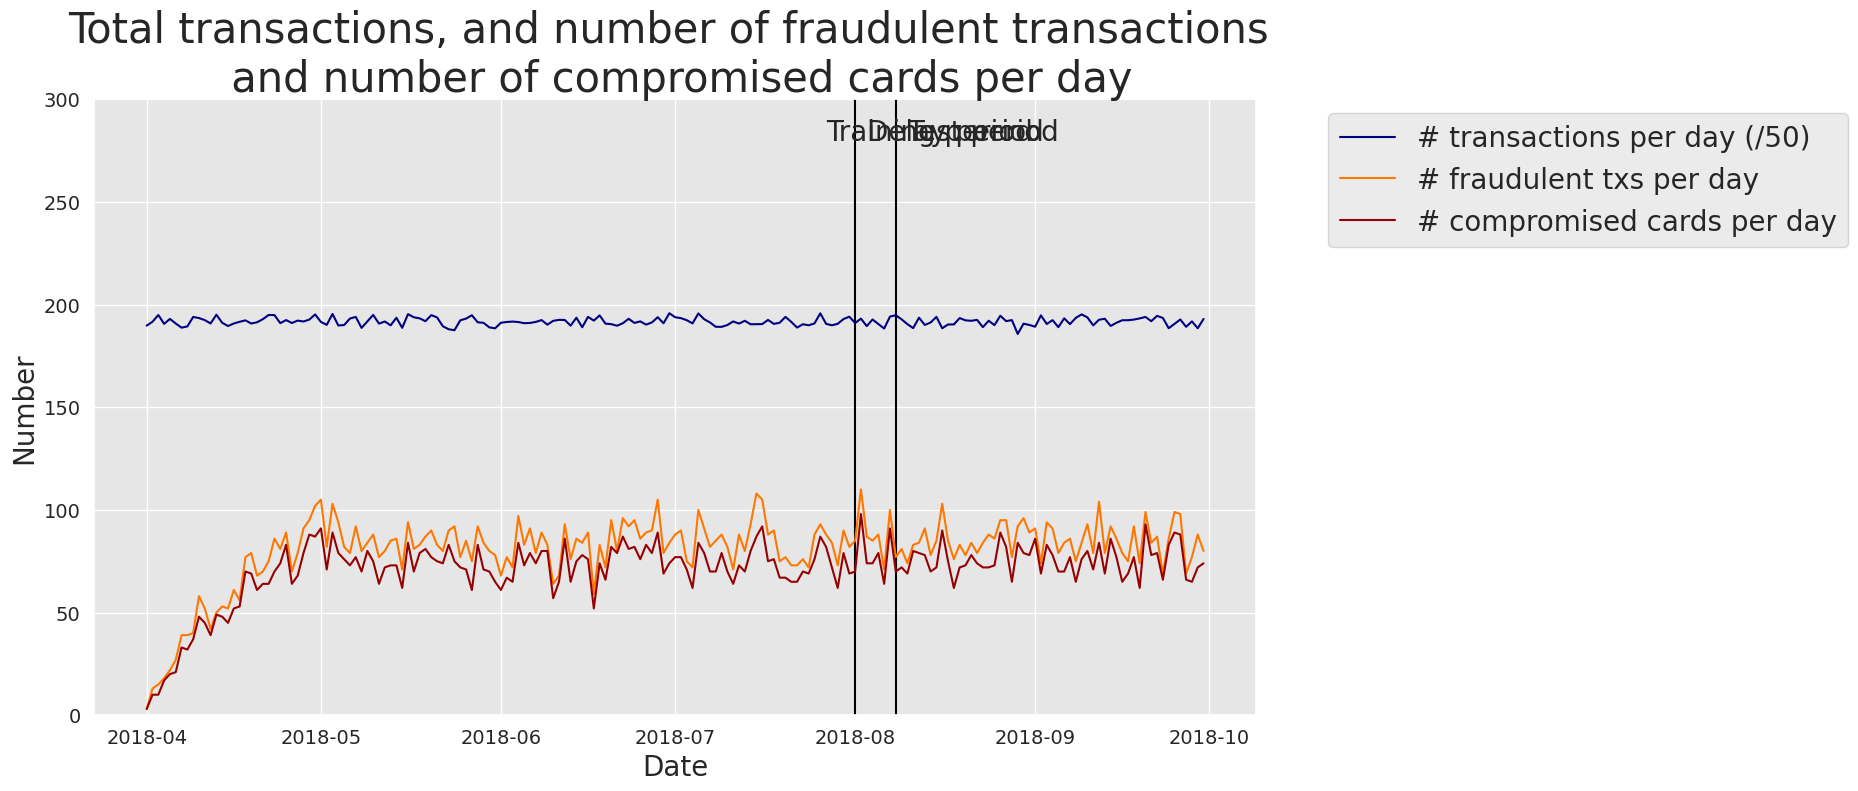

In [56]:
fraud_and_transactions_stats_fig

creating a test and training datasets , condition being training datasets are  7 days greater than the test data keeping delta days 7

In [57]:
def get_train_test_set(transactions_df,
                       start_date_training,
                       delta_train=7,delta_delay=7,delta_test=7):

    # Get the training set data
    train_df = transactions_df[(transactions_df.TX_DATETIME>=start_date_training) &
                               (transactions_df.TX_DATETIME<start_date_training+datetime.timedelta(days=delta_train))]

    # Get the test set data
    test_df = []

    # Note: Cards known to be compromised after the delay period are removed from the test set
    # That is, for each test day, all frauds known at (test_day-delay_period) are removed

    # First, get known defrauded customers from the training set
    known_defrauded_customers = set(train_df[train_df.TX_FRAUD==1].CUSTOMER_ID)

    # Get the relative starting day of training set (easier than TX_DATETIME to collect test data)
    start_tx_time_days_training = train_df.TX_TIME_DAYS.min()

    # Then, for each day of the test set
    for day in range(delta_test):

        # Get test data for that day
        test_df_day = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                    delta_train+delta_delay+
                                                                    day]

        # Compromised cards from that test day, minus the delay period, are added to the pool of known defrauded customers
        test_df_day_delay_period = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                                delta_train+
                                                                                day-1]

        new_defrauded_customers = set(test_df_day_delay_period[test_df_day_delay_period.TX_FRAUD==1].CUSTOMER_ID)
        known_defrauded_customers = known_defrauded_customers.union(new_defrauded_customers)

        test_df_day = test_df_day[~test_df_day.CUSTOMER_ID.isin(known_defrauded_customers)]

        test_df.append(test_df_day)

    test_df = pd.concat(test_df)

    # Sort data sets by ascending order of transaction ID
    train_df=train_df.sort_values('TRANSACTION_ID')
    test_df=test_df.sort_values('TRANSACTION_ID')

    return (train_df, test_df)

In [58]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=7,delta_delay=7,delta_test=7)

In [59]:
train_df.shape

(67240, 23)

In [60]:
train_df[train_df.TX_FRAUD==1].shape

(598, 23)

In [61]:
test_df.shape

(58264, 23)

In [62]:
test_df[test_df.TX_FRAUD==1].shape

(385, 23)

In [63]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

now the most awaited part, training a model, model predection is on sklearn python library , using methods to fit test datasets and getting output of the predection value , all methods will be calculated and done below.

In [64]:
def fit_model_and_get_predictions(classifier, train_df, test_df,
                                  input_features, output_feature="TX_FRAUD",scale=True):

    # By default, scales input data
    if scale:
        (train_df, test_df)=scaleData(train_df,test_df,input_features)

    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    classifier.fit(train_df[input_features], train_df[output_feature])
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time

    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models,
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }

    return model_and_predictions_dictionary

In [65]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability,
# and set the random state to zero for reproducibility
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df,
                                                                 input_features, output_feature,
                                                                 scale=False)

In [66]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
1236698,1236698,2018-08-08 00:01:14,2765,2747,42.32,11145674,129,0,0,0,...,67.468529,120.0,64.611750,2.0,0.0,9.0,0.0,31.0,0.000000,0.003536
1236699,1236699,2018-08-08 00:02:33,714,2073,108.19,11145753,129,0,0,0,...,79.955455,124.0,85.365645,2.0,0.0,10.0,0.0,23.0,0.000000,0.003536
1236701,1236701,2018-08-08 00:08:40,4982,1258,26.13,11146120,129,0,0,0,...,56.269167,61.0,49.095902,1.0,0.0,10.0,0.0,26.0,0.076923,0.003536
1236702,1236702,2018-08-08 00:08:41,704,8501,65.81,11146121,129,0,0,0,...,62.643333,11.0,63.287273,1.0,0.0,6.0,0.0,23.0,0.000000,0.003536
1236703,1236703,2018-08-08 00:10:34,3085,4208,55.22,11146234,129,0,0,0,...,71.993846,72.0,59.899306,1.0,0.0,5.0,0.0,21.0,0.523810,0.003536


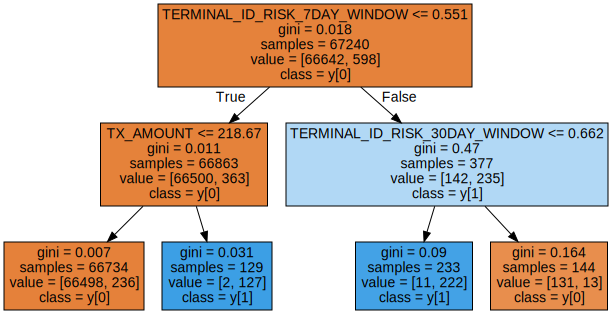

In [67]:
display(graphviz.Source(sklearn.tree.export_graphviz(classifier,feature_names=input_features,class_names=True, filled=True)))